# 5: Linear Regression and Train/Test Split

Use the `2013_movies.csv` data set:

## Challenge 1

Build a linear model that uses only a constant term (a column of ones) to predict a continuous outcome (like domestic total gross). How can you interpret the results of this model? What does it predict? Make a plot of predictions against actual outcome. Make a histogram of residuals. How are the residuals distributed?

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import patsy

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

/Users/brianmcmahon/anaconda3/envs/tensorflow1.4/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df = pd.read_csv('2013_movies.csv')

df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


In [3]:
df['Ones'] = 1 # make a column of ones
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,Ones
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00,1
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00,1
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00,1
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00,1
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00,1


In [4]:
X1 = df['Ones']
y = df['DomesticTotalGross']

model1 = sm.OLS(y, X1)
fit1 = model1.fit()
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       inf
Date:                Wed, 31 Jan 2018   Prob (F-statistic):                nan
Time:                        08:42:49   Log-Likelihood:                -1970.0
No. Observations:                 100   AIC:                             3942.
Df Residuals:                      99   BIC:                             3945.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Ones        1.006e+08   8.74e+06     11.510      0.000    8.33e+07    1.18e+08
==============================================================================
Omnibus:                       51.114   Durbin-Watson:                   0.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.961
Skew:                           1.985   Prob(JB):                     4.45e-28
Kurtosis:                       6.804   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0,0.5,'Predicted')

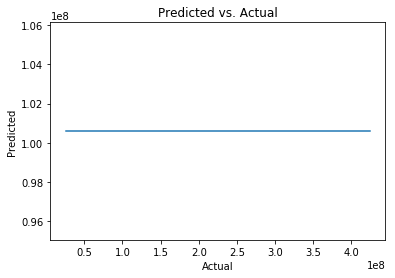

In [5]:
y_pred = fit1.predict(X1)

plt.plot(y, y_pred)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [6]:
residuals = y - y_pred

(array([47., 21., 15.,  3.,  3.,  4.,  3.,  0.,  1.,  3.]),
 array([-7.50286242e+07, -3.51186446e+07,  4.79133498e+06,  4.47013146e+07,
         8.46112942e+07,  1.24521274e+08,  1.64431253e+08,  2.04341233e+08,
         2.44251213e+08,  2.84161192e+08,  3.24071172e+08]),
 <a list of 10 Patch objects>)

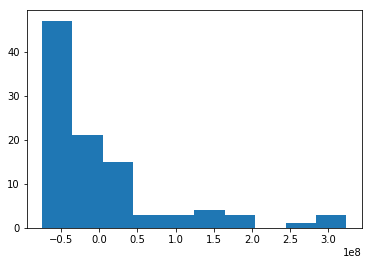

In [7]:
plt.hist(residuals)

## Challenge 2

Repeat the process of challenge one, but also add one continuous (numeric) predictor variable. Also add plots of model prediction against your feature variable and residuals against feature variable. How can you interpret what's happening in the model?

In [8]:
df.head(2)

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,Ones
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00,1
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00,1


In [9]:
X2 = pd.DataFrame(data=df,columns={'Budget','Ones'})
X2.head()

,Ones,Budget
0,1,130000000.0
1,1,200000000.0
2,1,150000000.0
3,1,76000000.0
4,1,225000000.0


In [10]:
model2 = sm.OLS(y, X2,missing='drop')
fit2 = model2.fit()
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     34.82
Date:                Wed, 31 Jan 2018   Prob (F-statistic):           6.80e-08
Time:                        08:42:49   Log-Likelihood:                -1738.1
No. Observations:                  89   AIC:                             3480.
Df Residuals:                      87   BIC:                             3485.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Ones         4.44e+07   1.27e+07      3.504      0.001    1.92e+07    6.96e+07
Budget         0.7846      0.133      5.901      0.000       0.520       1.049
==============================================================================
Omnibus:                       39.749   Durbin-Watson:                   0.674
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.441
Skew:                           1.587   Prob(JB):                     2.55e-22
Kurtosis:                       7.091   Cond. No.                     1.54e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.54e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
y_pred = fit2.predict(X2)

Text(0,0.5,'Domestic Gross Total')

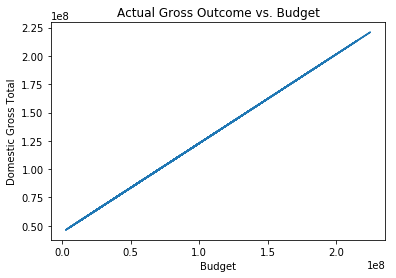

In [12]:
plt.plot(X2['Budget'], y_pred)
plt.title('Actual Gross Outcome vs. Budget')
plt.xlabel('Budget')
plt.ylabel('Domestic Gross Total')

**CS: Hmm, something went wrong there. Looks like you know how to do this, just made a mistake on this plot**

Text(0,0.5,'Residual')

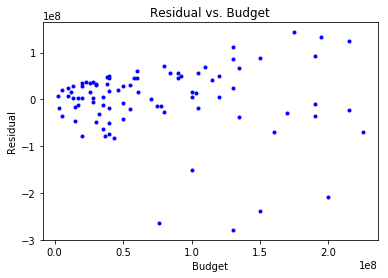

In [13]:
residual = y_pred - y
plt.plot(X2['Budget'], residual, 'b.')
plt.title('Residual vs. Budget')
plt.xlabel('Budget')
plt.ylabel('Residual')

## Challenge 3

Repeat the process of challenge 1, but add a categorical feature (like genre). You'll have to convert a column of text into a number of numerical columns ("dummy variables"). How can you interpret what's happening in the model?

In [14]:
X3 = pd.DataFrame(X1)

In [15]:
X3['G'] = (df['Rating'] == 'G').astype(int)
X3['PG'] = (df['Rating'] == 'PG').astype(int)
X3['PG13'] = (df['Rating'] == 'PG-13').astype(int)
X3['R'] = (df['Rating'] == 'R').astype(int)
X3.head()

,Ones,G,PG,PG13,R
0,1,0,0,1,0
1,1,0,0,1,0
2,1,0,1,0,0
3,1,0,1,0,0
4,1,0,0,1,0


In [16]:
model3 = sm.OLS(y, X3)
fit3 = model3.fit()
fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     3.924
Date:                Wed, 31 Jan 2018   Prob (F-statistic):             0.0109
Time:                        08:42:50   Log-Likelihood:                -1964.2
No. Observations:                 100   AIC:                             3936.
Df Residuals:                      96   BIC:                             3947.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Ones        1.162e+08   1.77e+07      6.568      0.000    8.11e+07    1.51e+08
G           1.523e+08   6.73e+07      2.265      0.026    1.88e+07    2.86e+08
PG          1.494e+07   2.44e+07      0.613      0.541   -3.34e+07    6.33e+07
PG13       -4.744e+06   2.01e+07     -0.236      0.814   -4.46e+07    3.51e+07
R           -4.63e+07   2.07e+07     -2.241      0.027   -8.73e+07    -5.3e+06
==============================================================================
Omnibus:                       46.897   Durbin-Watson:                   0.240
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.261
Skew:                           1.826   Prob(JB):                     1.88e-24
Kurtosis:                       6.589   Cond. No.                     1.85e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.08e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Challenge 4

Enhance your model further by adding more features and/or transforming existing features. Think about how you build the model matrix and how to interpret what the model is doing.

In [17]:
X4 = pd.DataFrame(X3)
X4['Budget'] = df['Budget']
X4['Runtime'] = df['Runtime']
X4.head()

,Ones,G,PG,PG13,R,Budget,Runtime
0,1,0,0,1,0,130000000.0,146
1,1,0,0,1,0,200000000.0,129
2,1,0,1,0,0,150000000.0,108
3,1,0,1,0,0,76000000.0,98
4,1,0,0,1,0,225000000.0,143


In [18]:
model4 = sm.OLS(y, X4, missing ='drop')
fit4 = model4.fit()
fit4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     9.089
Date:                Wed, 31 Jan 2018   Prob (F-statistic):           3.77e-06
Time:                        08:42:50   Log-Likelihood:                -1737.0
No. Observations:                  89   AIC:                             3484.
Df Residuals:                      84   BIC:                             3497.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Ones       -1.012e+07   4.05e+07     -0.250      0.803   -9.08e+07    7.05e+07
G             -0.0509      0.374     -0.136      0.892      -0.795       0.693
PG          1.438e+07   1.74e+07      0.826      0.411   -2.02e+07     4.9e+07
PG13       -1.342e+07   1.98e+07     -0.677      0.500   -5.28e+07     2.6e+07
R          -1.109e+07   2.03e+07     -0.547      0.586   -5.14e+07    2.92e+07
Budget         0.7036      0.165      4.255      0.000       0.375       1.032
Runtime     6.083e+05   5.21e+05      1.168      0.246   -4.27e+05    1.64e+06
==============================================================================
Omnibus:                       36.883   Durbin-Watson:                   0.740
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.319
Skew:                           1.525   Prob(JB):                     1.33e-18
Kurtosis:                       6.591   Cond. No.                     6.98e+23
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.66e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Challenge 5

Fitting and checking predictions on the exact same data set can be
misleading. Divide your data into two sets: a training and a test set
(roughly 75% training, 25% test is a fine split). Fit a model on the
training set, check the predictions (by plotting versus actual values)
in the test set.


In [19]:
from sklearn import cross_validation

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X4, y, train_size = 0.75)

/Users/brianmcmahon/anaconda3/envs/tensorflow1.4/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [20]:
model5 = sm.OLS(y_train, X_train, missing ='drop')
fit5 = model5.fit()
fit5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     8.616
Date:                Wed, 31 Jan 2018   Prob (F-statistic):           1.30e-05
Time:                        08:42:51   Log-Likelihood:                -1328.5
No. Observations:                  68   AIC:                             2667.
Df Residuals:                      63   BIC:                             2678.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Ones       -4.932e+07   5.38e+07     -0.917      0.363   -1.57e+08    5.82e+07
G              0.5294      0.605      0.875      0.385      -0.680       1.739
PG          8.852e+06   2.09e+07      0.424      0.673   -3.29e+07    5.06e+07
PG13       -3.243e+07   2.64e+07     -1.226      0.225   -8.53e+07    2.04e+07
R          -2.575e+07   2.49e+07     -1.034      0.305   -7.55e+07     2.4e+07
Budget         0.7193      0.196      3.672      0.000       0.328       1.111
Runtime     1.106e+06   6.95e+05      1.593      0.116   -2.82e+05    2.49e+06
==============================================================================
Omnibus:                       28.422   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.854
Skew:                           1.443   Prob(JB):                     1.23e-12
Kurtosis:                       6.322   Cond. No.                     5.87e+23
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.85e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [21]:
## Now predict on the test set with the training model
y_pred = fit5.predict(X_test)

Text(0,0.5,'Predicted y')

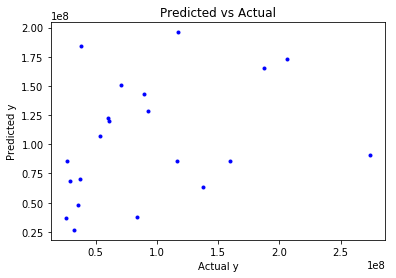

In [22]:
plt.plot(y_test, y_pred, 'b.')
plt.title('Predicted vs Actual')
plt.xlabel('Actual y')
plt.ylabel('Predicted y')